### Graphing the F(T)

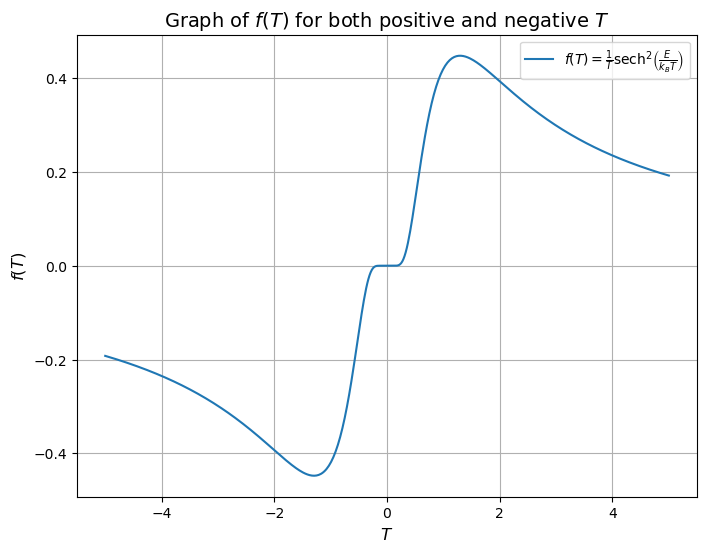

In [2]:
import numpy as np
import matplotlib.pyplot as plt

E = 1  
k_B = 1  

# Define the function f(T)
def f(T, E, k_B):
    return (1 / T) * np.cosh(E / (k_B * T))**(-2)

T_values = np.linspace(-5, 5, 500)
T_values = T_values[T_values != 0] 

f_values = f(T_values, E, k_B)

plt.figure(figsize=(8, 6))
plt.plot(T_values, f_values, label=r"$f(T) = \frac{1}{T} \text{sech}^2\left(\frac{E}{k_B T}\right)$")
plt.title(r"Graph of $f(T)$ for both positive and negative $T$", fontsize=14)
plt.xlabel(r"$T$", fontsize=12)
plt.ylabel(r"$f(T)$", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


In [3]:
import pandas as pd

# the function to calculate energy levels and their degeneracies
def calculate_degeneracies(max_energy, epsilon_0):
    degeneracies = {}
    
    for n_x in range(1, int((max_energy/epsilon_0)**0.5) + 1):
        for n_y in range(1, int((max_energy/epsilon_0)**0.5) + 1):
            energy = epsilon_0 * (n_x**2 + n_y**2)
            if energy <= max_energy:
                if energy not in degeneracies:
                    degeneracies[energy] = set()
                degeneracies[energy].add((n_x, n_y))
    
    return degeneracies

In [46]:
def energy_levels_and_degeneracies(max_energy, epsilon_0):
    degeneracies = calculate_degeneracies(max_energy, epsilon_0)
    
    energy_data = []
    for energy, states in degeneracies.items():
        energy_data.append([energy, len(states), states])
    
    df = pd.DataFrame(energy_data, columns=["Energy", "Degeneracy", "States"])
    
    return df

## Part (i)

In [48]:
max_energy = 25  
epsilon_0 = 1  

energy_degeneracies_df = energy_levels_and_degeneracies(max_energy, epsilon_0)

display(energy_degeneracies_df)

,Energy,Degeneracy,States
0,2,1,"{(1, 1)}"
1,5,2,"{(1, 2), (2, 1)}"
2,10,2,"{(3, 1), (1, 3)}"
3,17,2,"{(4, 1), (1, 4)}"
4,8,1,"{(2, 2)}"
5,13,2,"{(2, 3), (3, 2)}"
6,20,2,"{(2, 4), (4, 2)}"
7,18,1,"{(3, 3)}"
8,25,2,"{(3, 4), (4, 3)}"
